In [3]:
import numpy as np
import pandas as pd
# from konlpy.tag import *
import matplotlib.pylab as plt
%matplotlib inline
from korean_crawling_bundles import *

In [4]:
train_df = pd.read_csv('0916_with_link.csv')
train_df.tail()

,Link,Doc
92,http://v.media.daum.net/v/20180916190054628,9·13주택시장안정대책의 대출규제가 보유 주택 수와 대출 목적에 따른 제재 수준을 ...
93,http://v.media.daum.net/v/20180916185843604,(서울=연합뉴스) 배영경 윤보람 기자 = 이번 평양 남북정상회담 방북단 명단에는 이...
94,http://v.media.daum.net/v/20180916181416870,(서울=연합뉴스) 금융팀 = 집값 폭등을 잡기 위한 '9·13 대책'의 후속 조치로...
95,http://v.media.daum.net/v/20180916181003788,▲ 랜드로버 디스커버리\n▲ 아우디 A6\n[디지털타임스 김양혁 기자] 수입차 시장...
96,http://v.media.daum.net/v/20180916175802545,9월18일 열리는 제3차 남북 정상회담을 앞두고 남북 경제 협력 사업에 대한 기대감...


In [ ]:
kkma = Kkma()

train = train_df.iloc[:,1:].values
train_report = [train[i][0] for i in range(len(train))]
print(len(train_report))
train_report[0]

In [2]:
try:
    training_ls = [str(kkma.nouns(train_report[i])) for i in range(len(train_report))]
except : 
    excepted_ls.append(i)
    print('{}th data is excepted, maybe it has NaN value'.format(i))
    
display(Markdown('#### length of data : {}'.format(len(training_ls))))

NameError: name 'excepted_ls' is not defined

In [11]:
word_df = pd.DataFrame(data = training_ls,columns=np.arange(1))
# df.to_csv('0916_konlpy.csv')
word_df.tail()

,0
92,"['9', '13', '13주택시장안정', '주택', '시장', '안정', '대책'..."
93,"['서울', '연합', '연합뉴스', '뉴스', '배영', '배영경', '경', '..."
94,"['서울', '연합', '연합뉴스', '뉴스', '금융', '금융팀', '팀', '..."
95,"['랜드', '랜드로버', '로버', '디스', '디스커버', '커버', '아우',..."
96,"['9', '9월18일', '월', '18', '일', '저', '3', '3차',..."


In [12]:
for i in range(len(word_df)) : 
    word_df.iat[i,0] = word_df.iat[i,0][1:-1]
    
word_ls = []
for i in range(len(word_df)) : 
    new_ls = word_df.iat[i,0].split(',')

    for i in range(len(new_ls)) : 
        new_ls[i] = new_ls[i].replace(' ','')
    
    for i in range(len(new_ls)) : 
        new_ls[i] = new_ls[i].replace("'",'')
    
    word_ls += new_ls
len(word_ls)

25240

In [13]:
print(len(word_ls))
for _ in range(10):
    for idx,i in enumerate(word_ls) : 
        if len(i) < 3:
             word_ls.pop(idx)
    print(len(word_ls))

25240
14906
10031
8322
8002
7990


In [14]:
from collections import Counter
cnt_dict = dict(Counter(word_ls))

df = pd.DataFrame(columns=['Count'])
df['Count'] = cnt_dict.values()
df.index = cnt_dict.keys()
df.sort_values('Count',ascending=False,inplace=True)

df

,Count
2018.09,38
16일,38
가능성,36
가운데,34
13일,29
부동산,29
대통령,28
지난달,26
포인트,23
연합뉴스,23


,Count
count,3691.000000
mean,2.164725
std,2.725064
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,38.000000


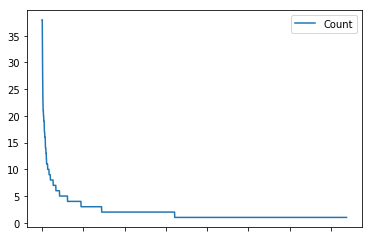

In [22]:
display(df.describe())
display(df.plot())

In [16]:
testing_ls = list(df[df['Count']>1].index)
len(testing_ls)

1606

In [17]:
count_dictionary = dict(zip(np.arange(len(train_df)),[0 for _ in range(len(train_df))]))
for idx,doc in enumerate(train_df['Doc']):
    for word in testing_ls : 
        if word in doc : 
            count_dictionary[idx] += 1
count_dictionary

{0: 41,
 1: 102,
 2: 47,
 3: 32,
 4: 35,
 5: 90,
 6: 79,
 7: 112,
 8: 104,
 9: 47,
 10: 51,
 11: 73,
 12: 38,
 13: 37,
 14: 64,
 15: 59,
 16: 117,
 17: 116,
 18: 82,
 19: 122,
 20: 41,
 21: 38,
 22: 109,
 23: 77,
 24: 59,
 25: 33,
 26: 42,
 27: 28,
 28: 62,
 29: 41,
 30: 93,
 31: 16,
 32: 59,
 33: 81,
 34: 62,
 35: 94,
 36: 29,
 37: 39,
 38: 87,
 39: 66,
 40: 65,
 41: 94,
 42: 84,
 43: 75,
 44: 104,
 45: 61,
 46: 68,
 47: 62,
 48: 70,
 49: 120,
 50: 123,
 51: 63,
 52: 86,
 53: 84,
 54: 104,
 55: 96,
 56: 95,
 57: 40,
 58: 71,
 59: 40,
 60: 29,
 61: 41,
 62: 38,
 63: 21,
 64: 83,
 65: 76,
 66: 60,
 67: 35,
 68: 78,
 69: 47,
 70: 38,
 71: 76,
 72: 55,
 73: 50,
 74: 65,
 75: 43,
 76: 40,
 77: 39,
 78: 100,
 79: 44,
 80: 30,
 81: 32,
 82: 87,
 83: 77,
 84: 108,
 85: 100,
 86: 45,
 87: 47,
 88: 69,
 89: 34,
 90: 33,
 91: 61,
 92: 56,
 93: 113,
 94: 113,
 95: 80,
 96: 119}

In [19]:
final_df = pd.DataFrame(columns=['Count'])
final_df['Count'] = count_dictionary.values()
final_df.index = count_dictionary.keys()
final_df.sort_values('Count',ascending=False,inplace=True)

final_df

,Count
50,123
19,122
49,120
96,119
16,117
17,116
93,113
94,113
7,112
22,109


In [25]:
most_freq = final_df.iloc[:5]
least_freq = final_df.iloc[-5:]

In [26]:
display(most_freq)
display(least_freq)

,Count
50,123
19,122
49,120
96,119
16,117


,Count
60,29
36,29
27,28
63,21
31,16


In [33]:
most_freq_link = []
least_freq_link = []

for idx in list(most_freq.index) : 
    most_freq_link.append(train_df['Link'][idx])
for idx in list(most_freq.index) :     
    least_freq_link.append(train_df['Link'][idx])
print(len(most_freq_link) , len(least_freq_link))

5 5


In [34]:
display(most_freq_link)
display(least_freq_link)

['https://finance.naver.com/news/news_read.nhn?article_id=0004202035&office_id=018&mode=mainnews&type=&date=2018-09-16&page=1',
 'http://finance.daum.net/news/news_content.daum?type=main&sub_type=&docid=MD20180916175802545&limit=30&page=1',
 'https://finance.naver.com/news/news_read.nhn?article_id=0004202055&office_id=018&mode=mainnews&type=&date=2018-09-16&page=1',
 'http://v.media.daum.net/v/20180916175802545',
 'http://finance.daum.net/news/news_content.daum?type=main&sub_type=&docid=MD20180916185843604&limit=30&page=1']

['https://finance.naver.com/news/news_read.nhn?article_id=0004202035&office_id=018&mode=mainnews&type=&date=2018-09-16&page=1',
 'http://finance.daum.net/news/news_content.daum?type=main&sub_type=&docid=MD20180916175802545&limit=30&page=1',
 'https://finance.naver.com/news/news_read.nhn?article_id=0004202055&office_id=018&mode=mainnews&type=&date=2018-09-16&page=1',
 'http://v.media.daum.net/v/20180916175802545',
 'http://finance.daum.net/news/news_content.daum?type=main&sub_type=&docid=MD20180916185843604&limit=30&page=1']